# Задание 3

Проанализируйте траекторию градиентного спуска на примере квадратичных функций. Для этого придумайте две-три квадратичные функции от двух переменных, на которых работа методов будет отличаться.

## Инициализация

### Импорт библиотек

In [18]:
# Для анимаций
from matplotlib import rc
rc('animation', html='jshtml')
from matplotlib.animation import FuncAnimation

# Для больших анимаций
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 1000.0 

# Для графиков и прочего
import numpy as np
import scipy
from matplotlib import cm
import matplotlib.pyplot as plt
import math
import pandas as pd

# Для корректного отображения 
%matplotlib inline
plt.style.use('fivethirtyeight')

# Для таблиц
import csv 

# Для работы с файлами
import os

# Для progress bar
from tqdm import tqdm

### Градиент

In [19]:
def grad(f, x, delta=1e-9):
    """
    Функция вычисления градиента в заданной точке с константной точностью

    Аргументы:
    f -- функция
    x -- точка

    Возвращает:
    ans -- градиент функции в точке x
    """

    n = len(x)
    xd = np.copy(x)
    ans = np.zeros(n)

    for i in range(n):
        xd[i] += delta
        ans[i] = np.divide(f(xd) - f(x), delta)
        xd[i] -= delta

    return ans

### Градиентный спуск

In [20]:
def gradient_descent(f, x0, lr_search_func, num_iterations=1000, eps=1e-6, step_size=1, minimum=0, apply_min=False):
    """
    Функция вычисления градиентного спуска с заданной функцией поиска коэффициента обучения

    Аргументы:
    f -- функция
    x0 -- начальная точка
    ----------------------------------------------------------------------------
    lr_search_func -- функция поиска оптимального коэффициента обучения (learning rate)
        Аргументы:
        f -- функция
        a -- левая граница интервала
        b -- правая граница интервала
        eps -- точность поиска

        Возвращает:
        x -- точка минимума функции
    ----------------------------------------------------------------------------
    eps -- точность поиска
    num_iterations -- количество итераций
    step_size -- размер шага

    Возвращает:
    points -- массив оптимальных на каждом шаге точек
    """
    def line_search(x, d):
        fd = lambda alpha: f(x - alpha*d)
        alpha = lr_search_func(fd, 0, 1, eps)
        return alpha

    x = np.copy(x0)
    points = np.array([x])
    for i in range(num_iterations):
        if apply_min and abs(f(x) - minimum) < eps:
            break

        grad_x = grad(f, x);
        x = x - grad_x * line_search(x, grad_x) * step_size
        points = np.vstack([points, x])
    return points

### Отрисовка пространства

In [21]:
def init():
    global X, Y, Z, f, x0
    Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)

### 3D визуализация функции

In [22]:
def print_f(elev=30, azim=60):
  # Создание фигуры и трехмерной оси
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')

  # Установка угол обзора
  ax.view_init(elev=elev, azim=azim)

  # Построение поверхности
  ax.plot_surface(X, Y, Z)

  # Построение начальной точки
  ax.plot(x0[0], x0[1], f(x0), 'ro', label='Начальная точка')

  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  plt.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  plt.title('График функции с начальной точкой')
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)

  # Отображение графика
  plt.show()

### Линии уровня и градиент

In [23]:
def print_lines_grad(list_result, list_label, title='Градиентный спуск на уровнях функции', filename='', filename_extension='.png', dpi=1024):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111)

  for i in range(len(list_result)):
    levels=np.unique(np.sort(f(list_result[i])))
    ax.contour(X, Y, Z, levels=levels, colors='red', antialiased=True, linewidths=1.0)

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  # Добавление легенды
  if len(list_label) > 0:
    plt.legend(loc='upper left')

  if(filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)    

  plt.show()

### 3D визуализация градиента

In [24]:
def print_full_grad(list_result, list_label, title='Градиентный спуск на графике функции', elev = 30, azim = 80, filename='', filename_extension='.png', dpi=1024):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(projection='3d')

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    z = np.vectorize(lambda x, y: f(np.array([x, y])))(x, y)
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', zs=z, label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
  ax.view_init(elev=elev, azim=azim)
  
  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  if len(list_label) > 0:
    ax.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  if title != '':
    plt.title(title)
  
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)


  if(filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

  plt.show()

### Вывод данных в виде `.csv`

In [25]:
def save_result_table(result, filename, sp='%g', fields=[], generate_fields=False):
    with open(filename, 'w') as csvfile:  
        # создание объекта witer csv
        csvwriter = csv.writer(csvfile, quoting=csv.QUOTE_NONE)  
            
        if generate_fields:
            if len(result[0]) == 1:
                fields = ['X']
            elif len(result[0]) == 2:
                fields = ['X', 'Y']
            else:
                fields = [f"X[{i}]" for i in range(len(result[0]))]
            fields.append('F')

        # запись шапки
        if len(fields) > 0:
            csvwriter.writerow(fields)  
            
        # запись данных 
        data = np.insert(result, len(result[0]), [f(x) for x in result], axis=1)
        formatted_data = [[sp % x for x in row] for row in data]
        csvwriter.writerows(formatted_data)

In [26]:
def save_result(list_result, list_label, filepath='', sp='%g', fields=[], generate_fields=True):
    for i in range(len(list_result)):
        save_result_table(list_result[i], filepath + '.csv', sp, fields, generate_fields)

## Решение задания

### Функция градиентного спуска

In [27]:
def gradient_descent_constant(f, x0, lr=0.01, num_iterations=1000, minimum=0, apply_min=False):
    """
    Градиентный спуск c постоянным шагом.

    Аргументы:
    f -- функция
    x0 -- начальная точка
    lr -- постоянный коэффициент обучения (learning rate)
    num_iterations -- количество итераций

    Возвращает:
    gradient_descent(...)
    """
    def const_lr(f, a, b, eps=1e-6):
        return lr
    
    return gradient_descent(f, x0, const_lr, num_iterations, minimum=minimum, apply_min=apply_min)

### Методы одномерного поиска и функции градиентного спуска на их основе

#### Метод дихотомии

In [28]:
def dichotomy_search(f, a, b, eps=1e-6):
    """
    Метод дихотомии для поиска минимума функции f на интервале [a,b] с точностью eps

    Аргументы:
    f -- функция
    a -- начальная точка интервала
    b -- конечная точка интервала
    eps -- точность поиска

    Возвращает:
    x -- точка минимума функции
    """
    while b - a > eps:
        c = (a + b) / 2
        if f(c - eps) < f(c + eps):
            b = c
        else:
            a = c
    return (a + b) / 2

def gradient_descent_dichotomy(f, x0, num_iterations=1000, eps=1e-6, step_size=0.01, minimum=0, apply_min=False):
    """
    Градиентный спуск на основе метода дихотомии

    Аргументы:
    f -- функция
    x0 -- начальная точка
    num_iterations -- количество итераций
    eps -- точность поиска
    step_size -- размер шага
    
    Возвращает:
    gradient_descent(...)
    """

    return gradient_descent(f, x0, dichotomy_search, num_iterations, eps, step_size, minimum=minimum, apply_min=apply_min)

#### Метод Фибоначчи

In [29]:
def fibonacci_search(f, a, b, n):
    """
    Метод Фибоначчи для одномерного поиска.

    Аргументы:
    f -- функция
    a -- левая граница интервала
    b -- правая граница интервала
    n -- "точность" поиска функции

    Возвращает:
    x -- точка минимума
    """

    fib = [1, 1]
    while fib[-1] < n:
        fib.append(fib[-1] + fib[-2])

    k = len(fib) - 1
    x1 = a + (fib[k - 2] / fib[k]) * (b - a)
    x2 = a + (fib[k - 1] / fib[k]) * (b - a)
    f1 = f(x1)
    f2 = f(x2)

    for i in range(k - 2):
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (fib[k - i - 3] / fib[k - i - 1]) * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (fib[k - i - 2] / fib[k - i - 1]) * (b - a)
            f2 = f(x2)

    return (a + b) / 2

def gradient_descent_fibonacci(f, x0, num_iterations=1000, n=6900, step_size=0.01, minimum=0, apply_min=False):
    """
    Градиентный спуск на основе метода Фибоначчи

    Аргументы:
    f -- функция
    x0 -- начальная точка
    num_iterations -- количество итераций
    n -- "точность" поиска
    step_size -- размер шага
    
    Возвращает:
    gradient_descent(...)
    """

    return gradient_descent(f, x0, fibonacci_search, num_iterations, n, step_size, minimum=minimum, apply_min=apply_min)

#### Метод золотого сечения

In [30]:
def golden_section_search(f, a, b, eps=1e-6):
    """
    Метод золотого сечения для одномерного поиска.

    Аргументы:
    f -- функция
    a -- левая граница интервала
    b -- правая граница интервала
    eps -- точность поиска функции

    Возвращает:
    x -- точка минимума
    """
    phi = (1 + np.sqrt(5)) / 2
    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    while abs(b - a) > eps:
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
    return (a + b) / 2

def gradient_descent_golden_section(f, x0, num_iterations=1000, eps=1e-6, step_size=0.01, minimum=0, apply_min=False):
    """
    Градиентный спуск на основе метода золотого сечения.

    Аргументы:
    f -- функция
    x0 -- начальная точка
    num_iterations -- количество итераций
    eps -- точность поиска

    Возвращает:
    gradient_descent(...)
    """
    return gradient_descent(f, x0, golden_section_search, num_iterations, eps, step_size, minimum=minimum, apply_min=apply_min)

### Инициализация констант

#### Технические константы

In [31]:
PATH_IMAGE = 'Image' + os.sep
PATH_HQ = 'HQ' + os.sep
PATH_DATA = 'Data' + os.sep
CNST_DPI_IMAGE = 256
CNST_DPI_HQ = 1024

#### Константы задания

In [32]:
FILE_PREFIX = 'T3_'

### Пример 1

constant        ==> 3724.877219 in [ 34.999545,  49.999091]
dichotomy       ==>   0.000000 in [ -0.000000,  -0.000000]


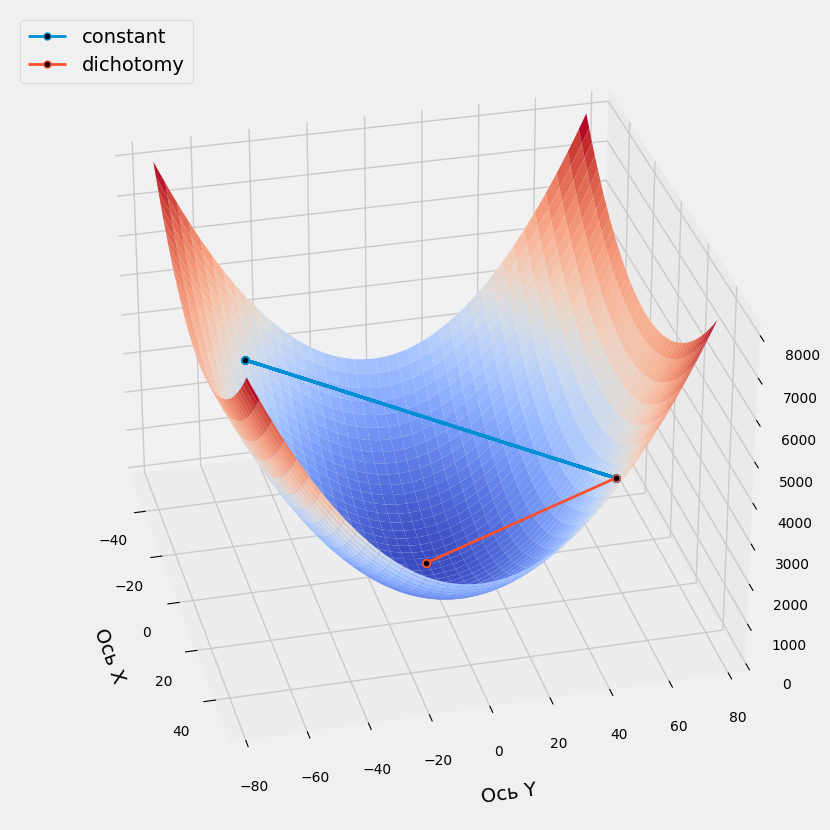

constant        ==> 3724.877219 in [ 34.999545,  49.999091]
dichotomy       ==>   0.000000 in [ -0.000000,  -0.000000]


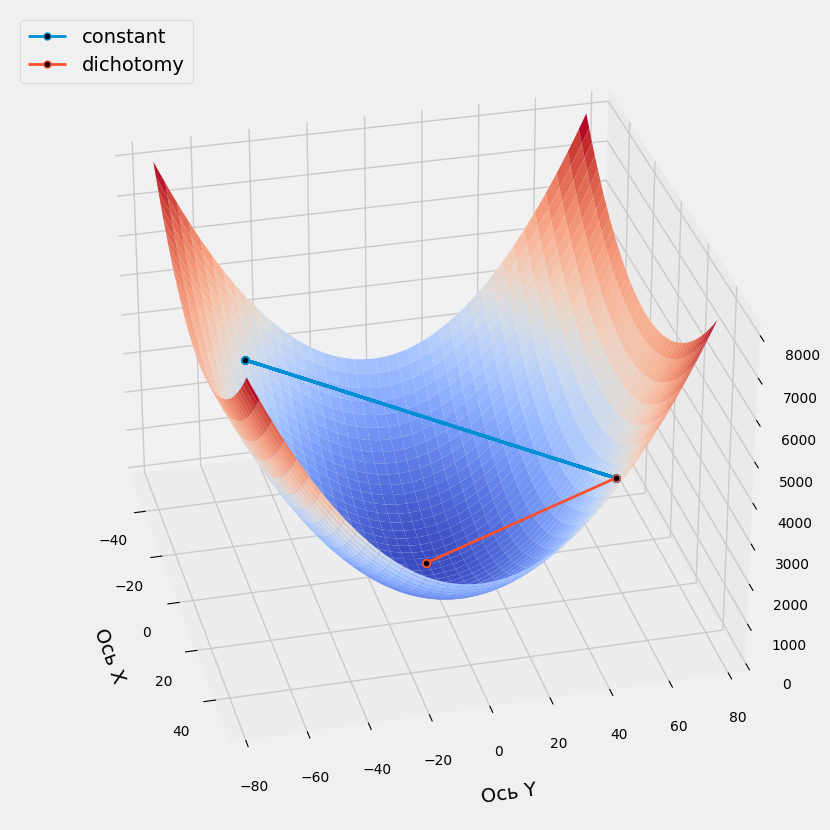

In [33]:
def f(x):
    return x[0] ** 2 + x[1] ** 2

x = np.linspace(-50, 50, 120)
y = np.linspace(-75, 75, 120)
X, Y = np.meshgrid(x, y)
x0 = np.array([35, 50], dtype=float)

init()


num_iter = 60
result = [gradient_descent_constant(f, x0, lr=1, num_iterations=num_iter),
          gradient_descent_dichotomy(f, x0, step_size=1, num_iterations=num_iter)]
result_label = ['constant', 'dichotomy']

save_result(result, result_label, PATH_DATA + FILE_PREFIX + 'F1')
print_full_grad(result, result_label, title='', elev=30, azim=-14, filename = PATH_IMAGE + FILE_PREFIX + 'F1', dpi = CNST_DPI_IMAGE)
print_full_grad(result, result_label, title='', elev=30, azim=-14, filename = PATH_HQ + FILE_PREFIX + 'F1' + '_' + 'HQ', dpi = CNST_DPI_HQ)

### Пример 2

constant        ==>   0.000000 in [  0.000099,  -0.000136]
dichotomy       ==>   0.000000 in [ -0.000000,  -0.000000]


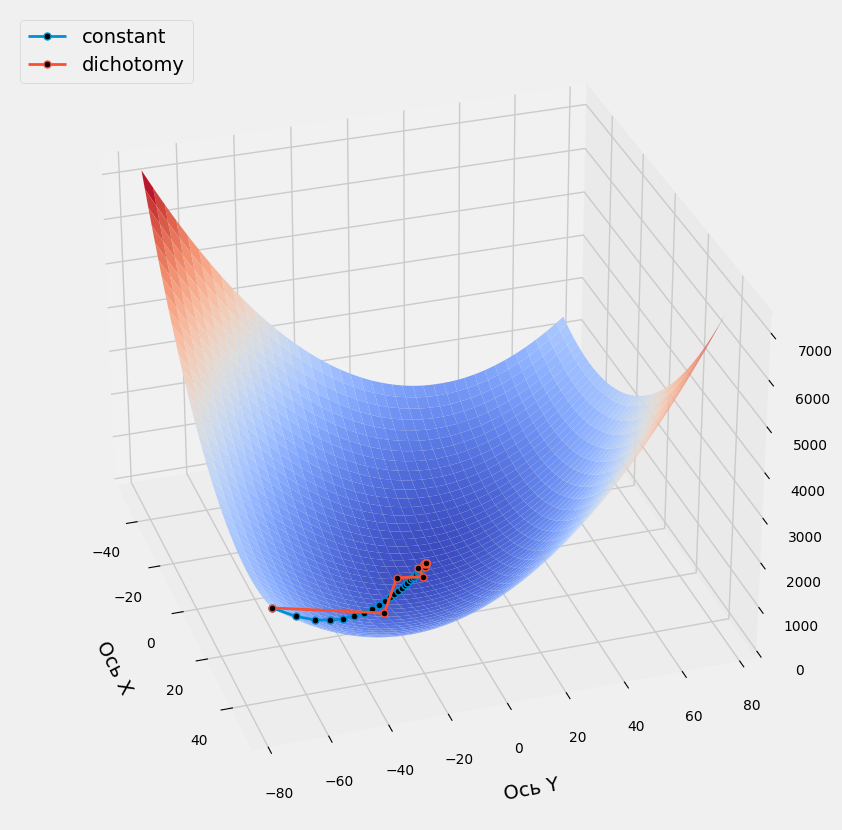

constant        ==>   0.000000 in [  0.000099,  -0.000136]
dichotomy       ==>   0.000000 in [ -0.000000,  -0.000000]


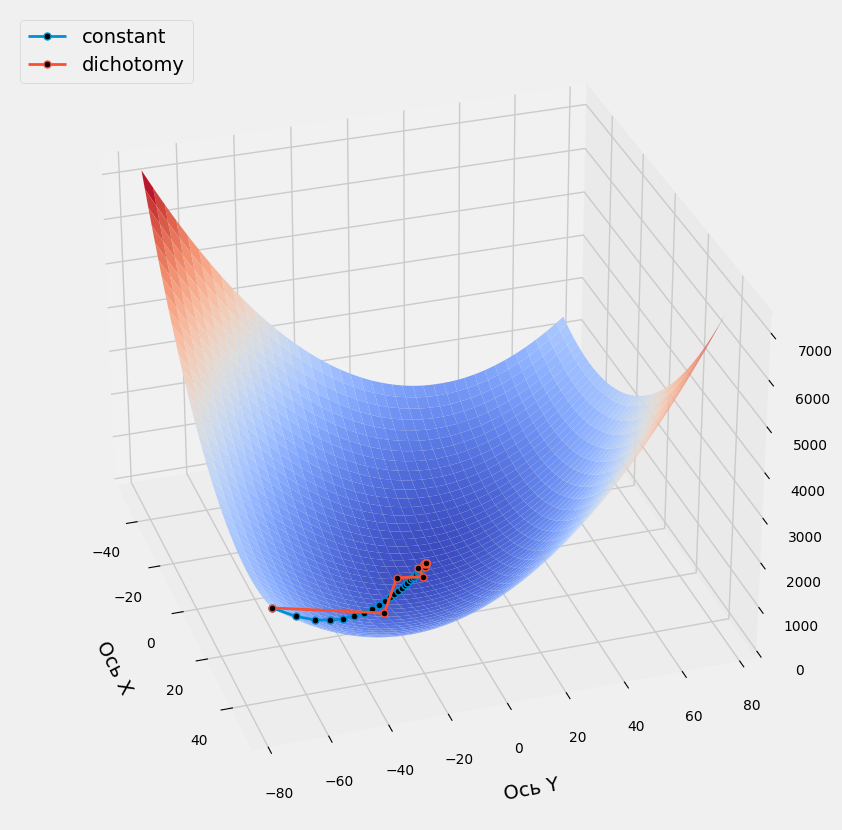

In [34]:
def f(x):
	A = np.array([[0.7464451039232642, 1.0905399322509766], [-0.45261597812262555, 0.5415655721418664]])
	return (x.dot(A)).dot(x.T)

x = np.linspace(-50, 50, 120)
y = np.linspace(-75, 75, 120)
X, Y = np.meshgrid(x, y)
x0 = np.array([50, -75], dtype=float)

init()


num_iter = 100
result = [gradient_descent_constant(f, x0, lr=0.2, num_iterations=num_iter),
          gradient_descent_dichotomy(f, x0, step_size=1, num_iterations=num_iter)]
result_label = ['constant', 'dichotomy']

save_result(result, result_label, PATH_DATA + FILE_PREFIX + 'F2')
print_full_grad(result, result_label, title='', elev=30, azim=-18, filename = PATH_IMAGE + FILE_PREFIX + 'F2', dpi = CNST_DPI_IMAGE)
print_full_grad(result, result_label, title='', elev=30, azim=-18, filename = PATH_HQ + FILE_PREFIX + 'F2' + '_' + 'HQ', dpi = CNST_DPI_HQ)